In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

# pandas Ï∂úÎ†• ÏÑ§Ï†ï
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

# ÏãúÍ∞ÅÌôî ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style('whitegrid')
sns.set_palette('husl')

print('ÌôòÍ≤Ω ÏÑ§Ï†ï ÏôÑÎ£å!')

ÌôòÍ≤Ω ÏÑ§Ï†ï ÏôÑÎ£å!


## 1. Ï∫êÍ∏Ä Îç∞Ïù¥ÌÑ∞ÏÖã Î∂àÎü¨Ïò§Í∏∞

### 1.1 Titanic Îç∞Ïù¥ÌÑ∞ÏÖã Îã§Ïö¥Î°úÎìú Î∞è Î°úÎìú ÌïòÍ∏∞


In [5]:
# Î∞©Î≤ï1: Ï∫êÍ∏Ä API ÏÇ¨Ïö© (kaggle API ÏÑ§Ïπò Î∞è Ïù∏Ï¶ù ÌïÑÏöî)
# !kaggle competitions download -c titanic


# Î∞©Î≤ï2: ÏßÅÏ†ë Îã§Ïö¥Î°úÎìú ÌõÑ Î°úÎìú (ÏùºÎ∞òÏ†ÅÏù∏ Î∞©Ïãù)
# https://www.kaggle.com/c/titanic/data ÏóêÏÑú Îã§Ïö¥Î°úÎìú

# Î∞©Î≤ï3: seaborn ÎÇ¥Ïû• Îç∞Ïù¥ÌÑ∞ ÏÖã ÏÇ¨Ïö©(Ïó∞ÏäµÏö©)

titanic = sns.load_dataset('titanic')


# ÎòêÎäî Î°úÏª¨ ÌååÏùºÏóêÏÑú Î°úÎìú
# titanic = pd.read_csv('train.csv')

print('=== Îç∞Ïù¥ÌÑ∞ÏÖã Í∏∞Î≥∏ Ï†ïÎ≥¥ ===')
print(f'Dataset shape: {titanic.shape}')
print(f'Columns: {list(titanic.columns)}')
print(f'Memory usage: {titanic.memory_usage(deep=True).sum() / 1024 ** 2:.2f} MB')

# Ï≤´ Î™áÌñâ ÌôïÏù∏
print('\n === Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå ===')
print(titanic.head())

# Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ÌôïÏù∏
print('\n === Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ===')
print(titanic.dtypes)

# Í∏∞Î≥∏ ÌÜµÍ≥Ñ Ï†ïÎ≥¥
print('\n === Í∏∞Î≥∏ ÌÜµÍ≥Ñ ===')
print(titanic.describe())

=== Îç∞Ïù¥ÌÑ∞ÏÖã Í∏∞Î≥∏ Ï†ïÎ≥¥ ===
Dataset shape: (891, 15)
Columns: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']
Memory usage: 0.31 MB

 === Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå ===
   survived  pclass     sex   age  sibsp  parch     fare embarked  class    who  adult_male deck  embark_town alive  alone
0         0       3    male  22.0      1      0   7.2500        S  Third    man        True  NaN  Southampton    no  False
1         1       1  female  38.0      1      0  71.2833        C  First  woman       False    C    Cherbourg   yes  False
2         1       3  female  26.0      0      0   7.9250        S  Third  woman       False  NaN  Southampton   yes   True
3         1       1  female  35.0      1      0  53.1000        S  First  woman       False    C  Southampton   yes  False
4         0       3    male  35.0      0      0   8.0500        S  Third    man        True  NaN  Southampton    no   Tru

## 1.2 Îç∞Ïù¥ÌÑ∞ ÌíàÏßà ÌôïÏù∏

In [9]:
# 1. Í∏∞Î≥∏ Ï†ïÎ≥¥
print(f'Dataset shape: {titanic.shape[0]:,} rows x {titanic.shape[1]} columns')
print(f'Memory usage: {titanic.memory_usage(deep=True).sum() / 1024 ** 2:.2f} MB')

Dataset shape: 891 rows x 15 columns
Memory usage: 0.31 MB


In [11]:
# 2. Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Î∂ÑÌè¨
dtype_counts = titanic.dtypes.value_counts()

print(f'\n Data Types Distribution:')
for dtype, count in dtype_counts.items():
    print(f'   {dtype}: {count} columns')


 Data Types Distribution:
   object: 5 columns
   int64: 4 columns
   float64: 2 columns
   bool: 2 columns
   category: 1 columns
   category: 1 columns


In [12]:
# 3. Í≤∞Ï∏°Í∞í Î∂ÑÏÑù
missing_data = titanic.isnull().sum()
missing_percent = (missing_data / len(titanic)) * 100

missing_info = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_percent
}).sort_values('Missing_Count', ascending=False)

print(f'\n Missing Values Analysis:')
missing_cols = missing_info[missing_info['Missing_Count'] > 0]
if len(missing_cols) > 0:
    print(missing_cols)
else:
    print('No missing values found!')


 Missing Values Analysis:
             Missing_Count  Missing_Percentage
deck                   688           77.216611
age                    177           19.865320
embarked                 2            0.224467
embark_town              2            0.224467


In [16]:
# 4. Ï§ëÎ≥µÍ∞í ÌôïÏù∏
duplicates = titanic.duplicated().sum()
print(f'\n Duplicate Rows: {duplicates} ({duplicates/len(titanic)*100:.1f}%)')


 Duplicate Rows: 107 (12.0%)


In [18]:
# 5. Ïú†ÎãàÌÅ¨Í∞í Î∂ÑÏÑù (Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞)
print(f'\n Unique Values Analysis:')
categorical_cols = titanic.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    unique_count = titanic[col].nunique()
    unique_ratio = unique_count / len(titanic) * 100
    print(f'  {col}: {unique_count} unique values ({unique_ratio:.1f}%)')



 Unique Values Analysis:
  sex: 2 unique values (0.2%)
  embarked: 3 unique values (0.3%)
  class: 3 unique values (0.3%)
  who: 3 unique values (0.3%)
  deck: 7 unique values (0.8%)
  embark_town: 3 unique values (0.3%)
  alive: 2 unique values (0.2%)


## 1.3 ÌÉêÏÉâÏ†Å Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù (EDA) ÏãúÏûë

In [24]:
print('=== ÏÉùÏ°¥Î•† Í∏∞Î≥∏ Î∂ÑÏÑù ===')
survival_rate = titanic['survived'].mean()
print(f'Overall Survival Rate:{survival_rate:.1%}')

survival_counts = titanic['survived'].value_counts()
print(titanic['survived'])
print(survival_counts)
print(f'Survived:{survival_counts[1]} passengers')
print(f'Did not Survive:{survival_counts[0]} passengers')

=== ÏÉùÏ°¥Î•† Í∏∞Î≥∏ Î∂ÑÏÑù ===
Overall Survival Rate:38.4%
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64
survived
0    549
1    342
Name: count, dtype: int64
Survived:342 passengers
Did not Survive:549 passengers


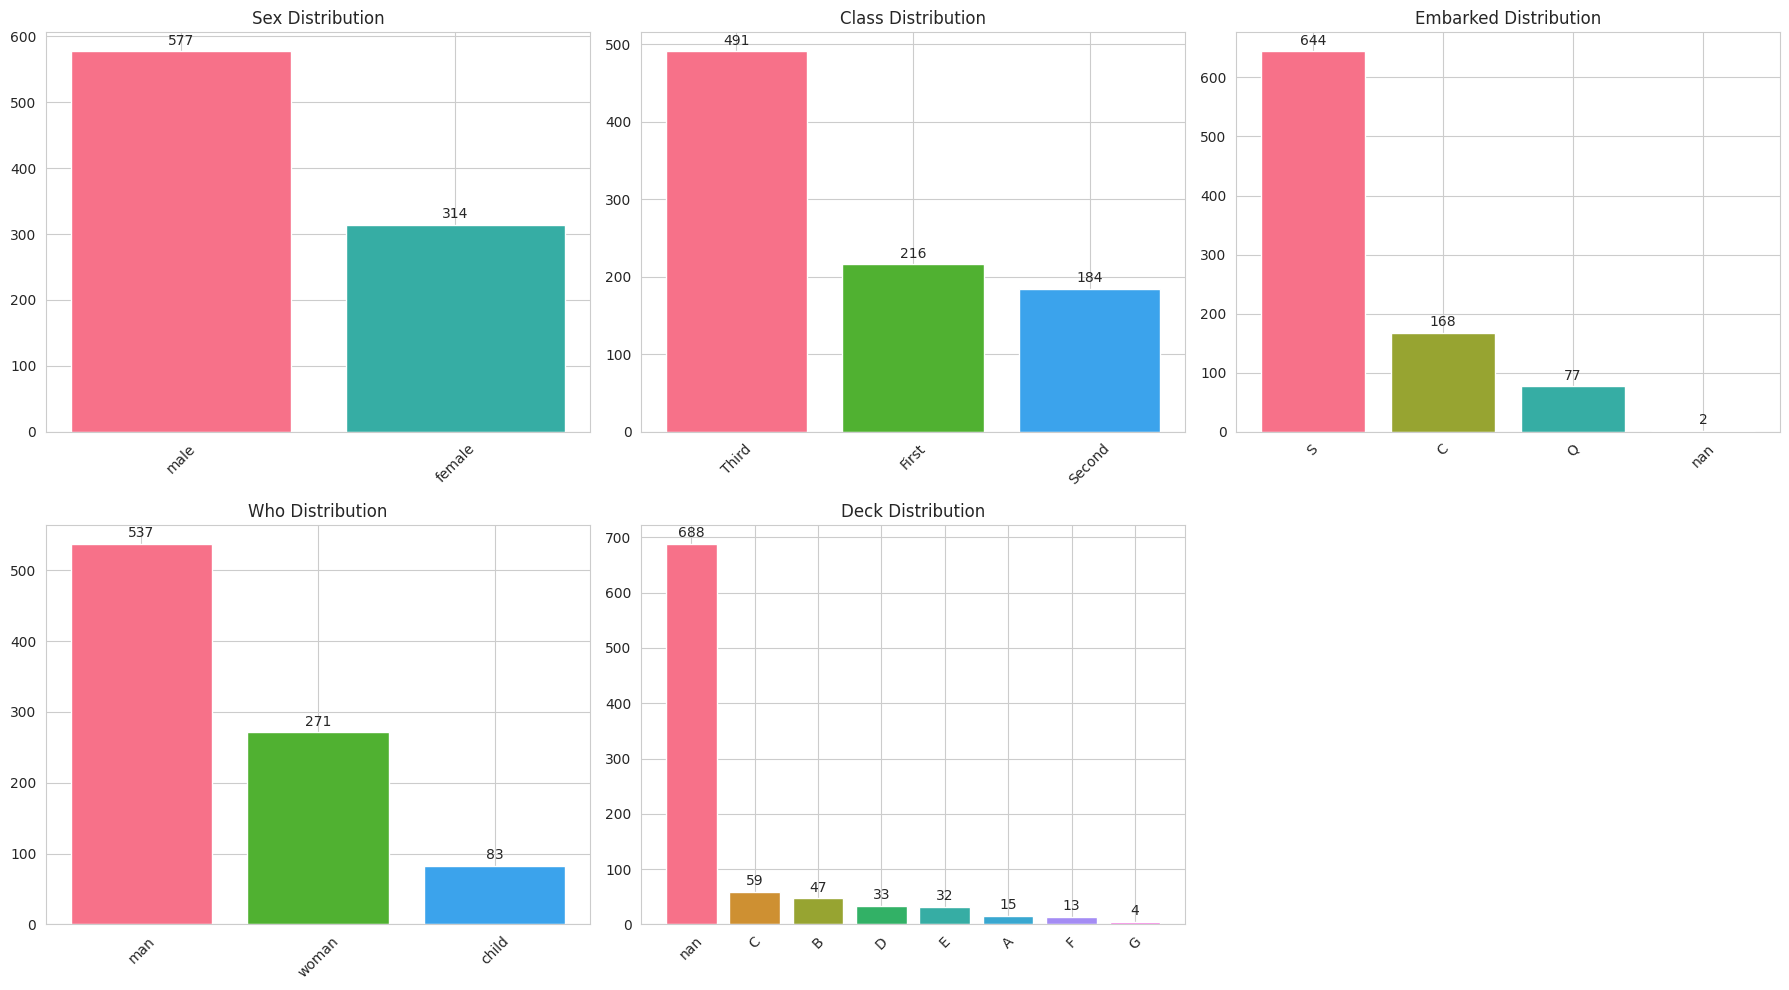

In [28]:
# Î≤îÏ£ºÌòï Î≥ÄÏàòÎì§Ïùò Î∂ÑÌè¨ ÌôïÏù∏
categorical_columns = ['sex', 'class', 'embarked', 'who', 'deck']

fig, axes = plt.subplots(2, 3, figsize=(18,10))

axes = axes.flatten()


for i, col in enumerate(categorical_columns):
    if col in titanic.columns:
        # Í≤∞Ï∏°Í∞íÏù¥ ÏûàÎäî Í≤ΩÏö∞ Ï≤òÎ¶¨
        if titanic[col].isnull().any():
            value_counts = titanic[col].value_counts(dropna = False)

        else:
            value_counts = titanic[col].value_counts()

    axes[i].bar(range(len(value_counts)), value_counts.values,
               color = sns.color_palette('husl', len(value_counts)))
    axes[i].set_title(f'{col.title()} Distribution')
    axes[i].set_xticks(range(len(value_counts)))
    axes[i].set_xticklabels(value_counts.index, rotation=45)

    # Í∞í Î†àÏù¥Î∏î Ï∂îÍ∞Ä
    for j, v in enumerate(value_counts.values):
        axes[i].text(j, v + max(value_counts.values) * 0.01, str(v),
                     ha='center', va='bottom')

# Îπà subplot Ïà®Í∏∞Í∏∞
for i in range(len(categorical_columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# 2. Îç∞Ïù¥ÌÑ∞ Ï°∞Ïûë Î∞è Ï†ÑÏ≤òÎ¶¨

## 2.1 Í≤∞Ï∏°Í∞í Ï≤òÎ¶¨ (Missing Data Handling)

In [31]:
missing_data = titanic.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_data / len(titanic)) * 100


missing_df = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_percent
})


# Í≤∞Ï∏°Í∞íÏù¥ ÏûàÎäî Ïª¨ÎüºÎßå ÌïÑÌÑ∞ÎßÅÌïòÍ∏∞
missing_df = missing_df[missing_df['Missing_Count'] > 0]

print('=== Missing Data Analysis ===')
print(missing_df)

=== Missing Data Analysis ===
             Missing_Count  Missing_Percentage
deck                   688           77.216611
age                    177           19.865320
embarked                 2            0.224467
embark_town              2            0.224467


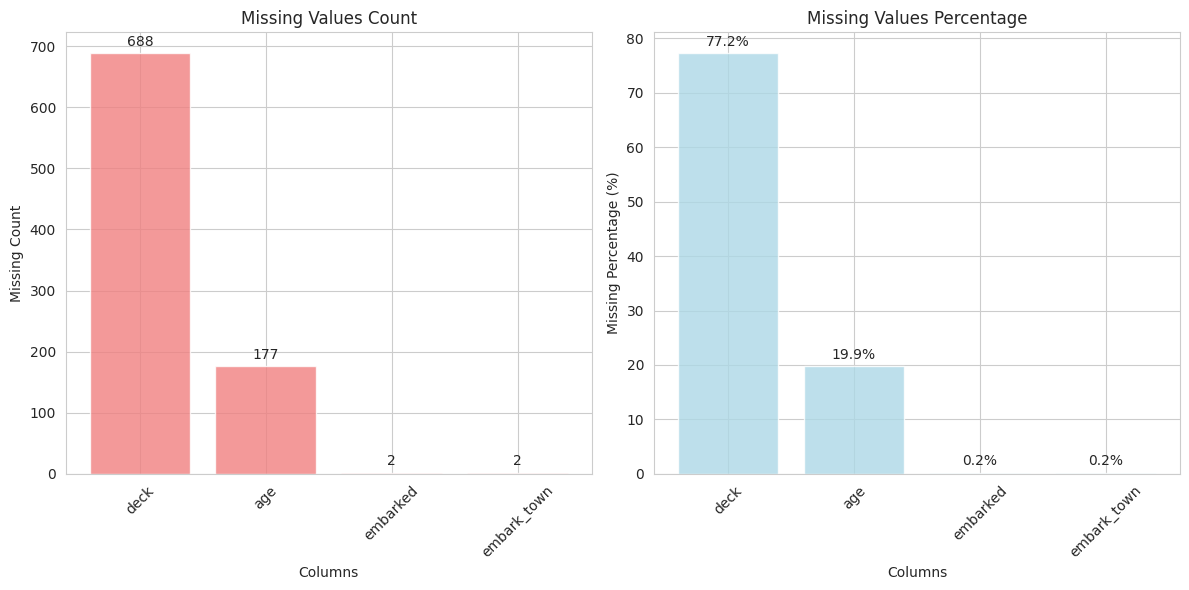

In [34]:
# Í≤∞Ï∏°Í∞í Ìå®ÌÑ¥ ÏãúÍ∞ÅÌôî
if len(missing_df) > 0:
    plt.figure(figsize=(12,6))

    # Í≤∞Ï∏°Í∞í Í∞úÏàò
    plt.subplot(1, 2, 1)
    bars = plt.bar(range(len(missing_df)), missing_df['Missing_Count'],
        color='lightcoral', alpha=0.8)
    plt.title('Missing Values Count')
    plt.xlabel('Columns')
    plt.ylabel('Missing Count')
    plt.xticks(range(len(missing_df)), missing_df.index,  rotation=45)

    # ÎßâÎåÄ ÏúÑÏóê Í∞í ÌëúÏãú
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + max(missing_df['Missing_Count']) * 0.01,
            f'{int(height)}', ha='center', va='bottom')

    # Í≤∞Ï∏°Í∞í ÎπÑÏú®
    plt.subplot(1, 2, 2)
    bars = plt.bar(range(len(missing_df)), missing_df['Missing_Percentage'], 
                      color='lightblue', alpha=0.8)
    plt.title('Missing Values Percentage')
    plt.xlabel('Columns')
    plt.ylabel('Missing Percentage (%)')
    plt.xticks(range(len(missing_df)), missing_df.index, rotation=45)

    # ÎßâÎåÄ ÏúÑÏóê Í∞í ÌëúÏãú
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + max(missing_df['Missing_Percentage']) * 0.01,
                f'{height:.1f}%', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

In [41]:
# Í≤∞Ï∏°Í∞í Ï≤òÎ¶¨ Ïã§Ìñâ
titanic_processed = titanic.copy()

# Î≤îÏö© Categorical Í≤∞Ï∏°Í∞í Ï≤òÎ¶¨ Ìï®Ïàò
def handle_categorical_fillna(df, column, fill_value):
    """Categorical Ïª¨ÎüºÏùò Í≤∞Ï∏°Í∞íÏùÑ ÏïàÏ†ÑÌïòÍ≤å Ï≤òÎ¶¨ÌïòÎäî Ìï®Ïàò"""
    if column not in df.columns:
        return df
    
    if df[column].isnull().any():
        if df[column].dtype.name == 'category':
            # Ïπ¥ÌÖåÍ≥†Î¶¨Ïóê fill_valueÍ∞Ä ÏóÜÏúºÎ©¥ Ï∂îÍ∞Ä
            if fill_value not in df[column].cat.categories:
                df[column] = df[column].cat.add_categories([fill_value])
            df[column] = df[column].fillna(fill_value)
        else:
            df[column] = df[column].fillna(fill_value)
        
        print(f"‚úÖ {column} Í≤∞Ï∏°Í∞í Ï≤òÎ¶¨ ÏôÑÎ£å: '{fill_value}'Î°ú ÎåÄÏ≤¥")
    
    return df

# 1. Age Í≤∞Ï∏°Í∞í Ï≤òÎ¶¨
if 'age' in titanic_processed.columns:
    age_median_by_group = titanic_processed.groupby(['sex', 'class'])['age'].median()
    
    def fill_age(row):
        if pd.isna(row['age']):
            return age_median_by_group.get((row['sex'], row['class']), 
                                         titanic_processed['age'].median())
        return row['age']
    
    titanic_processed['age'] = titanic_processed.apply(fill_age, axis=1)
    print(f"‚úÖ Age Í≤∞Ï∏°Í∞í Ï≤òÎ¶¨ ÏôÑÎ£å: {titanic['age'].isnull().sum()} ‚Üí {titanic_processed['age'].isnull().sum()}")

# 2. Embarked Í≤∞Ï∏°Í∞í Ï≤òÎ¶¨
if 'embarked' in titanic_processed.columns and titanic_processed['embarked'].isnull().any():
    most_common_port = titanic_processed['embarked'].mode()[0]
    titanic_processed = handle_categorical_fillna(titanic_processed, 'embarked', most_common_port)

# 3. Deck Í≤∞Ï∏°Í∞í Ï≤òÎ¶¨
titanic_processed = handle_categorical_fillna(titanic_processed, 'deck', 'Unknown')

# Ï≤òÎ¶¨ ÌõÑ Í≤∞Ï∏°Í∞í ÌôïÏù∏
print(f"\n=== Ï≤òÎ¶¨ ÌõÑ Í≤∞Ï∏°Í∞í ÌòÑÌô© ===")
remaining_missing = titanic_processed.isnull().sum()
print(remaining_missing[remaining_missing > 0])

‚úÖ Age Í≤∞Ï∏°Í∞í Ï≤òÎ¶¨ ÏôÑÎ£å: 177 ‚Üí 0
‚úÖ embarked Í≤∞Ï∏°Í∞í Ï≤òÎ¶¨ ÏôÑÎ£å: 'S'Î°ú ÎåÄÏ≤¥
‚úÖ deck Í≤∞Ï∏°Í∞í Ï≤òÎ¶¨ ÏôÑÎ£å: 'Unknown'Î°ú ÎåÄÏ≤¥

=== Ï≤òÎ¶¨ ÌõÑ Í≤∞Ï∏°Í∞í ÌòÑÌô© ===
embark_town    2
dtype: int64


## 2.2 ÏÉàÎ°úÏö¥ ÌäπÏÑ± ÏÉùÏÑ± (Feature Engineering)

In [43]:
# ÏÉàÎ°úÏö¥ ÌäπÏÑ± ÏÉùÏÑ±
def create_new_features(df):
    """ÎèÑÎ©îÏù∏ ÏßÄÏãùÏùÑ ÌôúÏö©Ìïú ÏÉàÎ°úÏö¥ ÌäπÏÑ± ÏÉùÏÑ±"""
    df = df.copy()
    
    # 1. Í∞ÄÏ°± Í∑úÎ™®
    if 'sibsp' in df.columns and 'parch' in df.columns:
        df['family_size'] = df['sibsp'] + df['parch'] + 1  # Î≥∏Ïù∏ Ìè¨Ìï®
        
        # Í∞ÄÏ°± Í∑úÎ™® Ïπ¥ÌÖåÍ≥†Î¶¨Ìôî
        def categorize_family_size(size):
            if size == 1:
                return 'Alone'
            elif size <= 4:
                return 'Small'
            else:
                return 'Large'
        
        df['family_size_category'] = df['family_size'].apply(categorize_family_size)
        print("‚úÖ Í∞ÄÏ°± Í∑úÎ™® ÌäπÏÑ± ÏÉùÏÑ± ÏôÑÎ£å")
    
    # 2. Ïó∞Î†π Í∑∏Î£π
    if 'age' in df.columns:
        age_bins = [0, 12, 18, 35, 60, 100]
        age_labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
        df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
        print("‚úÖ Ïó∞Î†π Í∑∏Î£π ÌäπÏÑ± ÏÉùÏÑ± ÏôÑÎ£å")
    
    # 3. ÏöîÍ∏à Í∑∏Î£π (ÏÇ¨Î∂ÑÏúÑÏàò Í∏∞Î∞ò)
    if 'fare' in df.columns:
        df['fare_group'] = pd.qcut(df['fare'].fillna(df['fare'].median()), 
                                  q=4, labels=['Low', 'Medium', 'High', 'Premium'])
        print("‚úÖ ÏöîÍ∏à Í∑∏Î£π ÌäπÏÑ± ÏÉùÏÑ± ÏôÑÎ£å")
    
    # 4. ÌÉÄÏù¥ÌãÄ Ï∂îÏ∂ú (Ïù¥Î¶ÑÏóêÏÑú)
    if 'name' in df.columns:
        df['title'] = df['name'].str.extract('([A-Za-z]+)\.', expand=False)
        
        # ÌÉÄÏù¥ÌãÄ Í∑∏Î£πÌôî
        title_mapping = {
            'Mr': 'Mr',
            'Miss': 'Miss',
            'Mrs': 'Mrs',
            'Master': 'Master',
            'Dr': 'Officer',
            'Rev': 'Officer',
            'Col': 'Officer',
            'Major': 'Officer',
            'Mlle': 'Miss',
            'Countess': 'Royalty',
            'Ms': 'Miss',
            'Lady': 'Royalty',
            'Jonkheer': 'Royalty',
            'Don': 'Royalty',
            'Dona': 'Royalty',
            'Mme': 'Mrs',
            'Capt': 'Officer',
            'Sir': 'Royalty'
        }
        
        df['title_grouped'] = df['title'].map(title_mapping).fillna('Other')
        print("‚úÖ ÌÉÄÏù¥ÌãÄ ÌäπÏÑ± ÏÉùÏÑ± ÏôÑÎ£å")
    
    # 5. ÌòºÏûê Ïó¨Ìñâ Ïó¨Î∂Ä
    if 'family_size' in df.columns:
        df['is_alone'] = (df['family_size'] == 1).astype(int)
        print("‚úÖ ÌòºÏûê Ïó¨Ìñâ ÌäπÏÑ± ÏÉùÏÑ± ÏôÑÎ£å")
    
    return df

# ÏÉàÎ°úÏö¥ ÌäπÏÑ± ÏÉùÏÑ± Ïã§Ìñâ
titanic_engineered = create_new_features(titanic_processed)

print(f"\n=== ÌäπÏÑ± ÏóîÏßÄÎãàÏñ¥ÎßÅ ÏôÑÎ£å ===")
print(f"Original features: {len(titanic.columns)}")
print(f"New features: {len(titanic_engineered.columns)}")
print(f"Added features: {list(set(titanic_engineered.columns) - set(titanic.columns))}")

# ÏÉàÎ°úÏö¥ ÌäπÏÑ±Îì§ ÌôïÏù∏
new_features = ['family_size', 'family_size_category', 'age_group', 'fare_group', 
               'title_grouped', 'is_alone']

existing_new_features = [feat for feat in new_features if feat in titanic_engineered.columns]

print(f"\n=== ÏÉàÎ°úÏö¥ ÌäπÏÑ± Î∂ÑÌè¨ ===")
for feature in existing_new_features:
    print(f"\n{feature}:")
    print(titanic_engineered[feature].value_counts())


‚úÖ Í∞ÄÏ°± Í∑úÎ™® ÌäπÏÑ± ÏÉùÏÑ± ÏôÑÎ£å
‚úÖ Ïó∞Î†π Í∑∏Î£π ÌäπÏÑ± ÏÉùÏÑ± ÏôÑÎ£å
‚úÖ ÏöîÍ∏à Í∑∏Î£π ÌäπÏÑ± ÏÉùÏÑ± ÏôÑÎ£å
‚úÖ ÌòºÏûê Ïó¨Ìñâ ÌäπÏÑ± ÏÉùÏÑ± ÏôÑÎ£å

=== ÌäπÏÑ± ÏóîÏßÄÎãàÏñ¥ÎßÅ ÏôÑÎ£å ===
Original features: 15
New features: 20
Added features: ['age_group', 'fare_group', 'is_alone', 'family_size', 'family_size_category']

=== ÏÉàÎ°úÏö¥ ÌäπÏÑ± Î∂ÑÌè¨ ===

family_size:
family_size
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

family_size_category:
family_size_category
Alone    537
Small    292
Large     62
Name: count, dtype: int64

age_group:
age_group
Young Adult    366
Adult          209
Child           68
Teen            45
Senior          26
Name: count, dtype: int64

fare_group:
fare_group
Medium     224
Low        223
High       222
Premium    222
Name: count, dtype: int64

is_alone:
is_alone
1    537
0    354
Name: count, dtype: int64


## 2.3 Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ Î∞è Ï†ïÎ†¨

In [45]:
# pandasÏùò Í∞ïÎ†•Ìïú ÌïÑÌÑ∞ÎßÅ Í∏∞Îä• (SQL WHEREÏ†àÍ≥º ÎπÑÍµê)
print("=== Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ ÏòàÏ†ú (SQL ÏøºÎ¶¨ÏôÄ ÎπÑÍµê) ===")

# Î®ºÏ†Ä ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Ïª¨Îüº ÌôïÏù∏
print(f"ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Ïª¨Îüº: {list(titanic_engineered.columns)}")
print()

# 1. Îã®Ïàú Ï°∞Í±¥ ÌïÑÌÑ∞ÎßÅ
# SQL: SELECT * FROM titanic WHERE age > 60;
seniors = titanic_engineered[titanic_engineered['age'] > 60]
print(f"1. 60ÏÑ∏ Ïù¥ÏÉÅ ÏäπÍ∞ù: {len(seniors)}Î™Ö")

# 2. Î≥µÌï© Ï°∞Í±¥
# SQL: SELECT * FROM titanic WHERE sex = 'female' AND class = 'First' AND survived = 1;
first_class_female_survivors = titanic_engineered[
    (titanic_engineered['sex'] == 'female') & 
    (titanic_engineered['class'] == 'First') & 
    (titanic_engineered['survived'] == 1)
]
print(f"2. 1Îì±Í∏â Ïó¨ÏÑ± ÏÉùÏ°¥Ïûê: {len(first_class_female_survivors)}Î™Ö")

# 3. IN Ï°∞Í±¥
# SQL: SELECT * FROM titanic WHERE class IN ('First', 'Second');
upper_class = titanic_engineered[titanic_engineered['class'].isin(['First', 'Second'])]
print(f"3. 1-2Îì±Í∏â ÏäπÍ∞ù: {len(upper_class)}Î™Ö")

# 4. Î¨∏ÏûêÏó¥ Ìå®ÌÑ¥ Îß§Ïπ≠ (name Ïª¨ÎüºÏù¥ ÏóÜÏúºÎØÄÎ°ú Îã§Î•∏ ÏòàÏ†úÎ°ú Î≥ÄÍ≤Ω)
# SQL: SELECT * FROM titanic WHERE embarked = 'S';
if 'embarked' in titanic_engineered.columns:
    southampton_passengers = titanic_engineered[titanic_engineered['embarked'] == 'S']
    print(f"4. ÏÇ¨Ïö∞Ïä§ÌñÑÌäº Ï∂úÎ∞ú ÏäπÍ∞ù: {len(southampton_passengers)}Î™Ö")

# 5. NULL Í∞í ÌôïÏù∏
# SQL: SELECT * FROM titanic WHERE age IS NOT NULL;
non_null_age = titanic_engineered[titanic_engineered['age'].notna()]
print(f"5. ÎÇòÏù¥ Ï†ïÎ≥¥Í∞Ä ÏûàÎäî ÏäπÍ∞ù: {len(non_null_age)}Î™Ö")

# 6. Î≤îÏúÑ Ï°∞Í±¥
# SQL: SELECT * FROM titanic WHERE fare BETWEEN 10 AND 50;
mid_fare_passengers = titanic_engineered[
    (titanic_engineered['fare'] >= 10) & (titanic_engineered['fare'] <= 50)
]
print(f"6. ÏöîÍ∏à 10-50 Î≤îÏúÑ ÏäπÍ∞ù: {len(mid_fare_passengers)}Î™Ö")

# Ï†ïÎ†¨ (SQL ORDER BY)
print(f"\n=== Îç∞Ïù¥ÌÑ∞ Ï†ïÎ†¨ ÏòàÏ†ú ===")

# 1. Îã®Ïùº Ïª¨Îüº Ï†ïÎ†¨ (name Ïª¨ÎüºÏù¥ ÏóÜÏúºÎØÄÎ°ú Îã§Î•∏ Ïª¨ÎüºÏúºÎ°ú Î≥ÄÍ≤Ω)
# SQL: SELECT * FROM titanic ORDER BY fare DESC;
sorted_by_fare = titanic_engineered.sort_values('fare', ascending=False)
print("1. ÏöîÍ∏à Í∏∞Ï§Ä ÎÇ¥Î¶ºÏ∞®Ïàú ÏÉÅÏúÑ 5Î™Ö:")
# ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Ïª¨ÎüºÎì§Î°ú Ï∂úÎ†•
available_cols = ['fare', 'class', 'sex', 'age']
display_cols = [col for col in available_cols if col in titanic_engineered.columns]
print(sorted_by_fare[display_cols].head())

# 2. Îã§Ï§ë Ïª¨Îüº Ï†ïÎ†¨
# SQL: SELECT * FROM titanic ORDER BY class ASC, fare DESC;
sorted_multi = titanic_engineered.sort_values(['class', 'fare'], ascending=[True, False])
print(f"\n2. ÌÅ¥ÎûòÏä§ Ïò§Î¶ÑÏ∞®Ïàú, ÏöîÍ∏à ÎÇ¥Î¶ºÏ∞®Ïàú ÏÉÅÏúÑ 5Î™Ö:")
print(sorted_multi[display_cols].head())

# 3. Ïù∏Îç±Ïä§ Í∏∞Ï§Ä Ï†ïÎ†¨
sorted_by_index = titanic_engineered.sort_index()
print(f"\n3. Ïù∏Îç±Ïä§ Í∏∞Ï§Ä Ï†ïÎ†¨ ÏôÑÎ£å (shape: {sorted_by_index.shape})")

# Ï∂îÍ∞Ä: Îçî Î≥µÌï©Ï†ÅÏù∏ ÌïÑÌÑ∞ÎßÅ ÏòàÏ†ú
print(f"\n=== Ï∂îÍ∞Ä ÌïÑÌÑ∞ÎßÅ ÏòàÏ†ú ===")

# 7. Ïó¨Îü¨ Ï°∞Í±¥ÏùÑ ÎßåÏ°±ÌïòÎäî ÏäπÍ∞ùÎì§
survivors_with_family = titanic_engineered[
    (titanic_engineered['survived'] == 1) & 
    (titanic_engineered['sibsp'] > 0) |  # ÌòïÏ†úÏûêÎß§Í∞Ä ÏûàÍ±∞ÎÇò
    (titanic_engineered['parch'] > 0)    # Î∂ÄÎ™®ÏûêÏãùÏù¥ ÏûàÎäî Í≤ΩÏö∞
]
print(f"7. Í∞ÄÏ°±Í≥º Ìï®Íªò ÌÉëÏäπÌïú ÏÉùÏ°¥Ïûê: {len(survivors_with_family)}Î™Ö")

# 8. ÎÇòÏù¥ÎåÄÎ≥Ñ ÌïÑÌÑ∞ÎßÅ (ÏÉàÎ°ú ÏÉùÏÑ±Ìïú age_groupÏù¥ ÏûàÎã§Î©¥)
if 'age_group' in titanic_engineered.columns:
    children = titanic_engineered[titanic_engineered['age_group'] == 'Child']
    print(f"8. Ïñ¥Î¶∞Ïù¥ ÏäπÍ∞ù: {len(children)}Î™Ö")

# 9. ÏöîÍ∏à ÏÉÅÏúÑ 10% ÏäπÍ∞ùÎì§
top_10_percent_threshold = titanic_engineered['fare'].quantile(0.9)
expensive_ticket_passengers = titanic_engineered[titanic_engineered['fare'] >= top_10_percent_threshold]
print(f"9. ÏöîÍ∏à ÏÉÅÏúÑ 10% ÏäπÍ∞ù: {len(expensive_ticket_passengers)}Î™Ö (ÏûÑÍ≥ÑÍ∞í: {top_10_percent_threshold:.2f})")

# 10. Ï°∞Í±¥Î∂Ä ÏßëÍ≥ÑÏôÄ ÌïÑÌÑ∞ÎßÅ
print(f"\n=== Ï°∞Í±¥Î∂Ä ÏßëÍ≥Ñ ÏòàÏ†ú ===")

# ÌÅ¥ÎûòÏä§Î≥Ñ ÏÉùÏ°¥Ïú®Ïù¥ 50% Ïù¥ÏÉÅÏù∏ ÌÅ¥ÎûòÏä§Îßå ÌïÑÌÑ∞ÎßÅ
class_survival_rate = titanic_engineered.groupby('class')['survived'].mean()
high_survival_classes = class_survival_rate[class_survival_rate >= 0.5]
print(f"10. ÏÉùÏ°¥Ïú® 50% Ïù¥ÏÉÅ ÌÅ¥ÎûòÏä§:")
for class_name, rate in high_survival_classes.items():
    print(f"    {class_name}: {rate:.1%}")

# Ïã§Ï†ú pandasÏôÄ SQL ÏøºÎ¶¨ Ìå®ÌÑ¥ ÎπÑÍµêÌëú Ï∂úÎ†•
print(f"\n=== pandas vs SQL ÏøºÎ¶¨ Ìå®ÌÑ¥ ÎπÑÍµê ===")
comparison_table = """
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ                    SQL                      ‚îÇ                   pandas                    ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ SELECT * FROM table WHERE age > 30          ‚îÇ df[df['age'] > 30]                         ‚îÇ
‚îÇ SELECT col1, col2 FROM table                ‚îÇ df[['col1', 'col2']]                       ‚îÇ
‚îÇ WHERE col1 = 'value' AND col2 > 10          ‚îÇ df[(df['col1']=='value') & (df['col2']>10)] ‚îÇ
‚îÇ WHERE col IN ('A', 'B', 'C')                ‚îÇ df[df['col'].isin(['A', 'B', 'C'])]        ‚îÇ
‚îÇ ORDER BY col1 DESC                          ‚îÇ df.sort_values('col1', ascending=False)    ‚îÇ
‚îÇ ORDER BY col1 ASC, col2 DESC                ‚îÇ df.sort_values(['col1','col2'], ascending=[True,False]) ‚îÇ
‚îÇ WHERE col IS NOT NULL                       ‚îÇ df[df['col'].notna()]                      ‚îÇ
‚îÇ WHERE col LIKE '%text%'                     ‚îÇ df[df['col'].str.contains('text')]         ‚îÇ
‚îÇ WHERE col BETWEEN 10 AND 50                 ‚îÇ df[(df['col']>=10) & (df['col']<=50)]      ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò
"""
print(comparison_table)

=== Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ ÏòàÏ†ú (SQL ÏøºÎ¶¨ÏôÄ ÎπÑÍµê) ===
ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Ïª¨Îüº: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone', 'family_size', 'family_size_category', 'age_group', 'fare_group', 'is_alone']

1. 60ÏÑ∏ Ïù¥ÏÉÅ ÏäπÍ∞ù: 22Î™Ö
2. 1Îì±Í∏â Ïó¨ÏÑ± ÏÉùÏ°¥Ïûê: 91Î™Ö
3. 1-2Îì±Í∏â ÏäπÍ∞ù: 400Î™Ö
4. ÏÇ¨Ïö∞Ïä§ÌñÑÌäº Ï∂úÎ∞ú ÏäπÍ∞ù: 644Î™Ö
5. ÎÇòÏù¥ Ï†ïÎ≥¥Í∞Ä ÏûàÎäî ÏäπÍ∞ù: 714Î™Ö
6. ÏöîÍ∏à 10-50 Î≤îÏúÑ ÏäπÍ∞ù: 395Î™Ö

=== Îç∞Ïù¥ÌÑ∞ Ï†ïÎ†¨ ÏòàÏ†ú ===
1. ÏöîÍ∏à Í∏∞Ï§Ä ÎÇ¥Î¶ºÏ∞®Ïàú ÏÉÅÏúÑ 5Î™Ö:
         fare  class     sex   age
679  512.3292  First    male  36.0
258  512.3292  First  female  35.0
737  512.3292  First    male  35.0
88   263.0000  First  female  23.0
438  263.0000  First    male  64.0

2. ÌÅ¥ÎûòÏä§ Ïò§Î¶ÑÏ∞®Ïàú, ÏöîÍ∏à ÎÇ¥Î¶ºÏ∞®Ïàú ÏÉÅÏúÑ 5Î™Ö:
         fare  class     sex   age
258  512.3292  First  female  35.0
679  512.3292  First    male  36.0
737  512.3292  First    ma

# üìä 3. Í∑∏Î£πÌôîÏôÄ ÏßëÍ≥Ñ Î∂ÑÏÑù

## 3.1 Í∑∏Î£πÌôî Í∏∞Î≥∏ (GROUP BYÏôÄ ÎπÑÍµê)

In [46]:
# pandas groupby vs SQL GROUP BY ÎπÑÍµê

print("=== Í∑∏Î£πÌôî Î∞è ÏßëÍ≥Ñ Î∂ÑÏÑù ===")

# 1. Í∏∞Î≥∏ Í∑∏Î£πÌôî
# SQL: SELECT sex, COUNT(*) FROM titanic GROUP BY sex;
gender_counts = titanic_engineered.groupby('sex').size()
print("1. ÏÑ±Î≥Ñ ÏäπÍ∞ù Ïàò:")
print(gender_counts)

# 2. Îã§Ï§ë ÏßëÍ≥Ñ Ìï®Ïàò
# SQL: SELECT class, AVG(age), COUNT(*), MIN(fare), MAX(fare) FROM titanic GROUP BY class;
class_stats = titanic_engineered.groupby('class').agg({
    'age': ['mean', 'count'],
    'fare': ['min', 'max', 'mean'],
    'survived': 'mean'
}).round(2)

# Ïª¨ÎüºÎ™Ö Ï†ïÎ¶¨
class_stats.columns = ['avg_age', 'passenger_count', 'min_fare', 'max_fare', 'avg_fare', 'survival_rate']
print(f"\n2. ÌÅ¥ÎûòÏä§Î≥Ñ ÌÜµÍ≥Ñ:")
print(class_stats)

# 3. Îã§Ï§ë Í∑∏Î£πÌôî
# SQL: SELECT sex, class, COUNT(*), AVG(survived) FROM titanic GROUP BY sex, class;
survival_by_gender_class = titanic_engineered.groupby(['sex', 'class']).agg({
    'survived': ['count', 'sum', 'mean']
}).round(3)

survival_by_gender_class.columns = ['total_passengers', 'survivors', 'survival_rate']
print(f"\n3. ÏÑ±Î≥Ñ-ÌÅ¥ÎûòÏä§Î≥Ñ ÏÉùÏ°¥Ïú®:")
print(survival_by_gender_class)

# 4. Ï°∞Í±¥Î∂Ä ÏßëÍ≥Ñ (CASE WHENÍ≥º Ïú†ÏÇ¨)
def age_survival_analysis(df):
    """Ïó∞Î†πÎåÄÎ≥Ñ ÏÉùÏ°¥Ïú® Î∂ÑÏÑù"""
    if 'age_group' in df.columns:
        age_survival = df.groupby('age_group').agg({
            'survived': ['count', 'sum', 'mean'],
            'fare': 'mean'
        }).round(2)
        
        age_survival.columns = ['total', 'survivors', 'survival_rate', 'avg_fare']
        return age_survival
    return None

age_analysis = age_survival_analysis(titanic_engineered)
if age_analysis is not None:
    print(f"\n4. Ïó∞Î†πÎåÄÎ≥Ñ ÏÉùÏ°¥Ïú®:")
    print(age_analysis)

# 5. Ïª§Ïä§ÌÖÄ ÏßëÍ≥Ñ Ìï®Ïàò
def custom_stats(series):
    """Ïª§Ïä§ÌÖÄ ÌÜµÍ≥Ñ Ìï®Ïàò"""
    return pd.Series({
        'count': len(series),
        'mean': series.mean(),
        'std': series.std(),
        'q25': series.quantile(0.25),
        'median': series.median(),
        'q75': series.quantile(0.75)
    })

print(f"\n5. ÌÅ¥ÎûòÏä§Î≥Ñ ÏöîÍ∏à ÏÉÅÏÑ∏ ÌÜµÍ≥Ñ:")
fare_detailed_stats = titanic_engineered.groupby('class')['fare'].apply(custom_stats).round(2)
print(fare_detailed_stats)

=== Í∑∏Î£πÌôî Î∞è ÏßëÍ≥Ñ Î∂ÑÏÑù ===
1. ÏÑ±Î≥Ñ ÏäπÍ∞ù Ïàò:
sex
female    314
male      577
dtype: int64

2. ÌÅ¥ÎûòÏä§Î≥Ñ ÌÜµÍ≥Ñ:
        avg_age  passenger_count  min_fare  max_fare  avg_fare  survival_rate
class                                                                        
First     38.23              186       0.0    512.33     84.15           0.63
Second    29.88              173       0.0     73.50     20.66           0.47
Third     25.14              355       0.0     69.55     13.68           0.24

3. ÏÑ±Î≥Ñ-ÌÅ¥ÎûòÏä§Î≥Ñ ÏÉùÏ°¥Ïú®:
               total_passengers  survivors  survival_rate
sex    class                                             
female First                 94         91          0.968
       Second                76         70          0.921
       Third                144         72          0.500
male   First                122         45          0.369
       Second               108         17          0.157
       Third                347         4

## 3.2 ÌîºÎ≤ó ÌÖåÏù¥Î∏îÍ≥º ÌÅ¨Î°úÏä§ÌÉ≠

=== ÌîºÎ≤ó ÌÖåÏù¥Î∏î Î∂ÑÏÑù ===
1. ÌÅ¥ÎûòÏä§-ÏÑ±Î≥Ñ ÏÉùÏ°¥Ïú® ÌîºÎ≤ó ÌÖåÏù¥Î∏î:
sex     female   male
class                
First    0.968  0.369
Second   0.921  0.157
Third    0.500  0.135

2. Îã§Ï§ë Í∞í ÌîºÎ≤ó ÌÖåÏù¥Î∏î (ÏÉùÏ°¥Ïú® & ÌèâÍ∑† ÏöîÍ∏à):
          fare        survived      
sex     female   male   female  male
class                               
First   106.13  67.23     0.97  0.37
Second   21.97  19.74     0.92  0.16
Third    16.12  12.66     0.50  0.14

3. Ïó∞Î†πÎåÄ-ÌÅ¥ÎûòÏä§ ÌÅ¨Î°úÏä§ÌÉ≠:
class        First  Second  Third  All
age_group                             
Child            4      17     47   68
Teen             8       6     31   45
Young Adult     61      97    208  366
Adult           96      49     64  209
Senior          17       4      5   26
All            186     173    355  714

4. Ïó∞Î†πÎåÄÎ≥Ñ ÌÅ¥ÎûòÏä§ ÎπÑÏú®:
class        First  Second  Third
age_group                        
Child        0.059   0.250  0.691
Teen         0.178   0.133  0.689
Young 

<Figure size 1200x800 with 0 Axes>

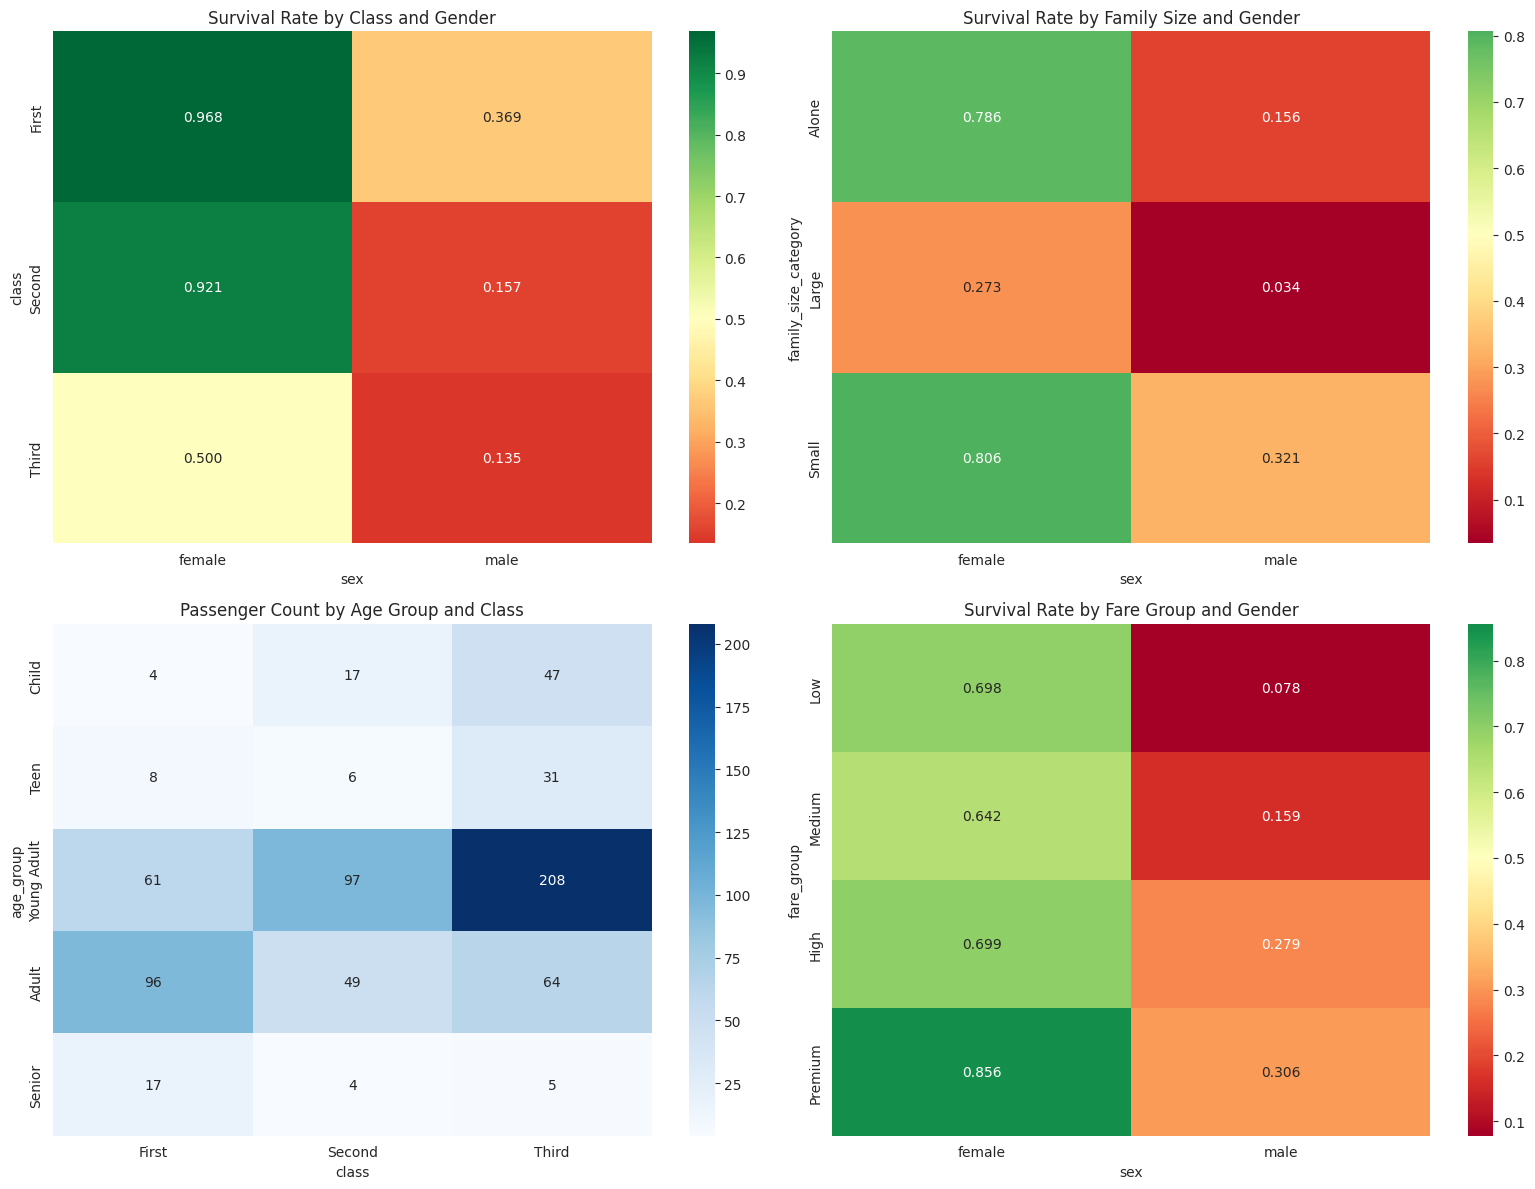

In [47]:
# Excel ÌîºÎ≤ó ÌÖåÏù¥Î∏îÍ≥º Ïú†ÏÇ¨Ìïú pandas ÌîºÎ≤ó ÌÖåÏù¥Î∏î

print("=== ÌîºÎ≤ó ÌÖåÏù¥Î∏î Î∂ÑÏÑù ===")

# 1. Í∏∞Î≥∏ ÌîºÎ≤ó ÌÖåÏù¥Î∏î - ÏÉùÏ°¥Ïú®
survival_pivot = pd.pivot_table(
    titanic_engineered,
    values='survived',
    index='class',
    columns='sex',
    aggfunc='mean'
).round(3)

print("1. ÌÅ¥ÎûòÏä§-ÏÑ±Î≥Ñ ÏÉùÏ°¥Ïú® ÌîºÎ≤ó ÌÖåÏù¥Î∏î:")
print(survival_pivot)

# 2. Îã§Ï§ë Í∞í ÌîºÎ≤ó ÌÖåÏù¥Î∏î
multi_value_pivot = pd.pivot_table(
    titanic_engineered,
    values=['survived', 'fare'],
    index='class',
    columns='sex',
    aggfunc={'survived': 'mean', 'fare': 'mean'}
).round(2)

print(f"\n2. Îã§Ï§ë Í∞í ÌîºÎ≤ó ÌÖåÏù¥Î∏î (ÏÉùÏ°¥Ïú® & ÌèâÍ∑† ÏöîÍ∏à):")
print(multi_value_pivot)

# 3. ÌÅ¨Î°úÏä§ÌÉ≠ - ÎπàÎèÑÏàò Î∂ÑÏÑù
if 'age_group' in titanic_engineered.columns:
    crosstab_age_class = pd.crosstab(
        titanic_engineered['age_group'],
        titanic_engineered['class'],
        margins=True  # Ï¥ùÍ≥Ñ Ï∂îÍ∞Ä
    )
    
    print(f"\n3. Ïó∞Î†πÎåÄ-ÌÅ¥ÎûòÏä§ ÌÅ¨Î°úÏä§ÌÉ≠:")
    print(crosstab_age_class)
    
    # ÎπÑÏú®Î°ú Î≥ÄÌôò
    crosstab_normalized = pd.crosstab(
        titanic_engineered['age_group'],
        titanic_engineered['class'],
        normalize='index'  # Ìñâ Í∏∞Ï§Ä ÎπÑÏú®
    ).round(3)
    
    print(f"\n4. Ïó∞Î†πÎåÄÎ≥Ñ ÌÅ¥ÎûòÏä§ ÎπÑÏú®:")
    print(crosstab_normalized)

# 5. ÏÉùÏ°¥Ïú® ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 8))

# ÏÑúÎ∏åÌîåÎ°Ø ÏÉùÏÑ±
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. ÌÅ¥ÎûòÏä§-ÏÑ±Î≥Ñ ÏÉùÏ°¥Ïú® ÌûàÌä∏Îßµ
sns.heatmap(survival_pivot, annot=True, fmt='.3f', cmap='RdYlGn', 
           center=0.5, ax=axes[0,0])
axes[0,0].set_title('Survival Rate by Class and Gender')

# 2. Í∞ÄÏ°± Í∑úÎ™®Î≥Ñ ÏÉùÏ°¥Ïú® (ÏûàÎäî Í≤ΩÏö∞)
if 'family_size_category' in titanic_engineered.columns:
    family_survival = pd.pivot_table(
        titanic_engineered,
        values='survived',
        index='family_size_category',
        columns='sex',
        aggfunc='mean'
    )
    sns.heatmap(family_survival, annot=True, fmt='.3f', cmap='RdYlGn',
               center=0.5, ax=axes[0,1])
    axes[0,1].set_title('Survival Rate by Family Size and Gender')

# 3. Ïó∞Î†πÎåÄ-ÌÅ¥ÎûòÏä§ ÏäπÍ∞ù Ïàò ÌûàÌä∏Îßµ
if 'age_group' in titanic_engineered.columns:
    age_class_counts = pd.pivot_table(
        titanic_engineered,
        values='survived',
        index='age_group',
        columns='class',
        aggfunc='count',
        fill_value=0
    )
    sns.heatmap(age_class_counts, annot=True, fmt='d', cmap='Blues',
               ax=axes[1,0])
    axes[1,0].set_title('Passenger Count by Age Group and Class')

# 4. ÏöîÍ∏à Í∑∏Î£πÎ≥Ñ ÏÉùÏ°¥Ïú® ÌûàÌä∏Îßµ
if 'fare_group' in titanic_engineered.columns:
    fare_survival = pd.pivot_table(
        titanic_engineered,
        values='survived',
        index='fare_group',
        columns='sex',
        aggfunc='mean'
    )
    sns.heatmap(fare_survival, annot=True, fmt='.3f', cmap='RdYlGn',
               center=0.5, ax=axes[1,1])
    axes[1,1].set_title('Survival Rate by Fare Group and Gender')

plt.tight_layout()
plt.show()

# üìà 4. Ïã¨Ìôî Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù Î∞è ÏãúÍ∞ÅÌôî

## 4.1 ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù

=== ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù ===
1. ÏÉùÏ°¥Í≥ºÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (Ï†àÎåìÍ∞í Í∏∞Ï§Ä):
pclass                    -0.338481
fare                       0.257307
fare_rank_in_class        -0.214012
is_alone                  -0.203367
age_percentile_in_class   -0.199295
parch                      0.081629
age                       -0.077221
sibsp                     -0.035322
family_size                0.016639
Name: survived, dtype: float64


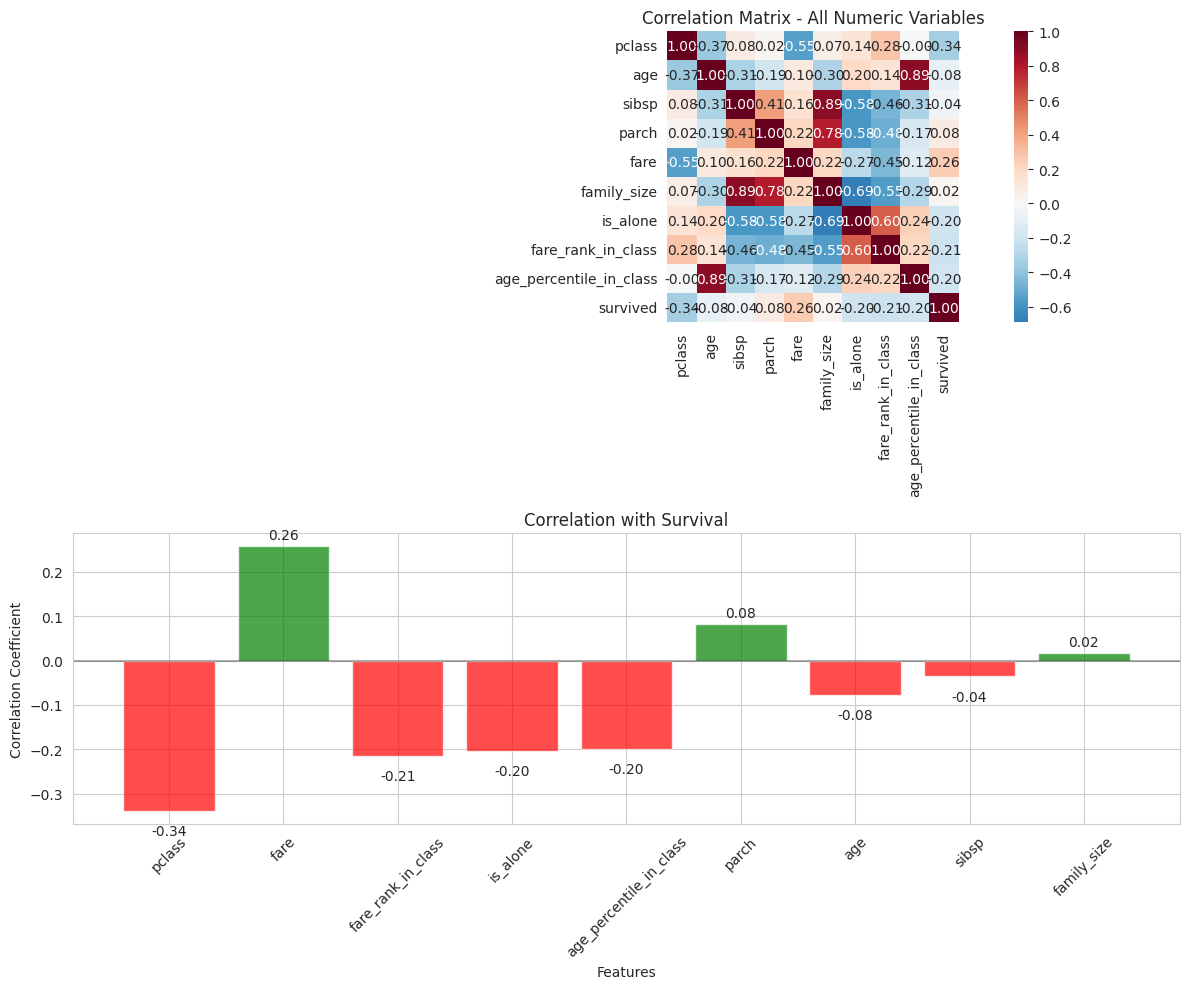

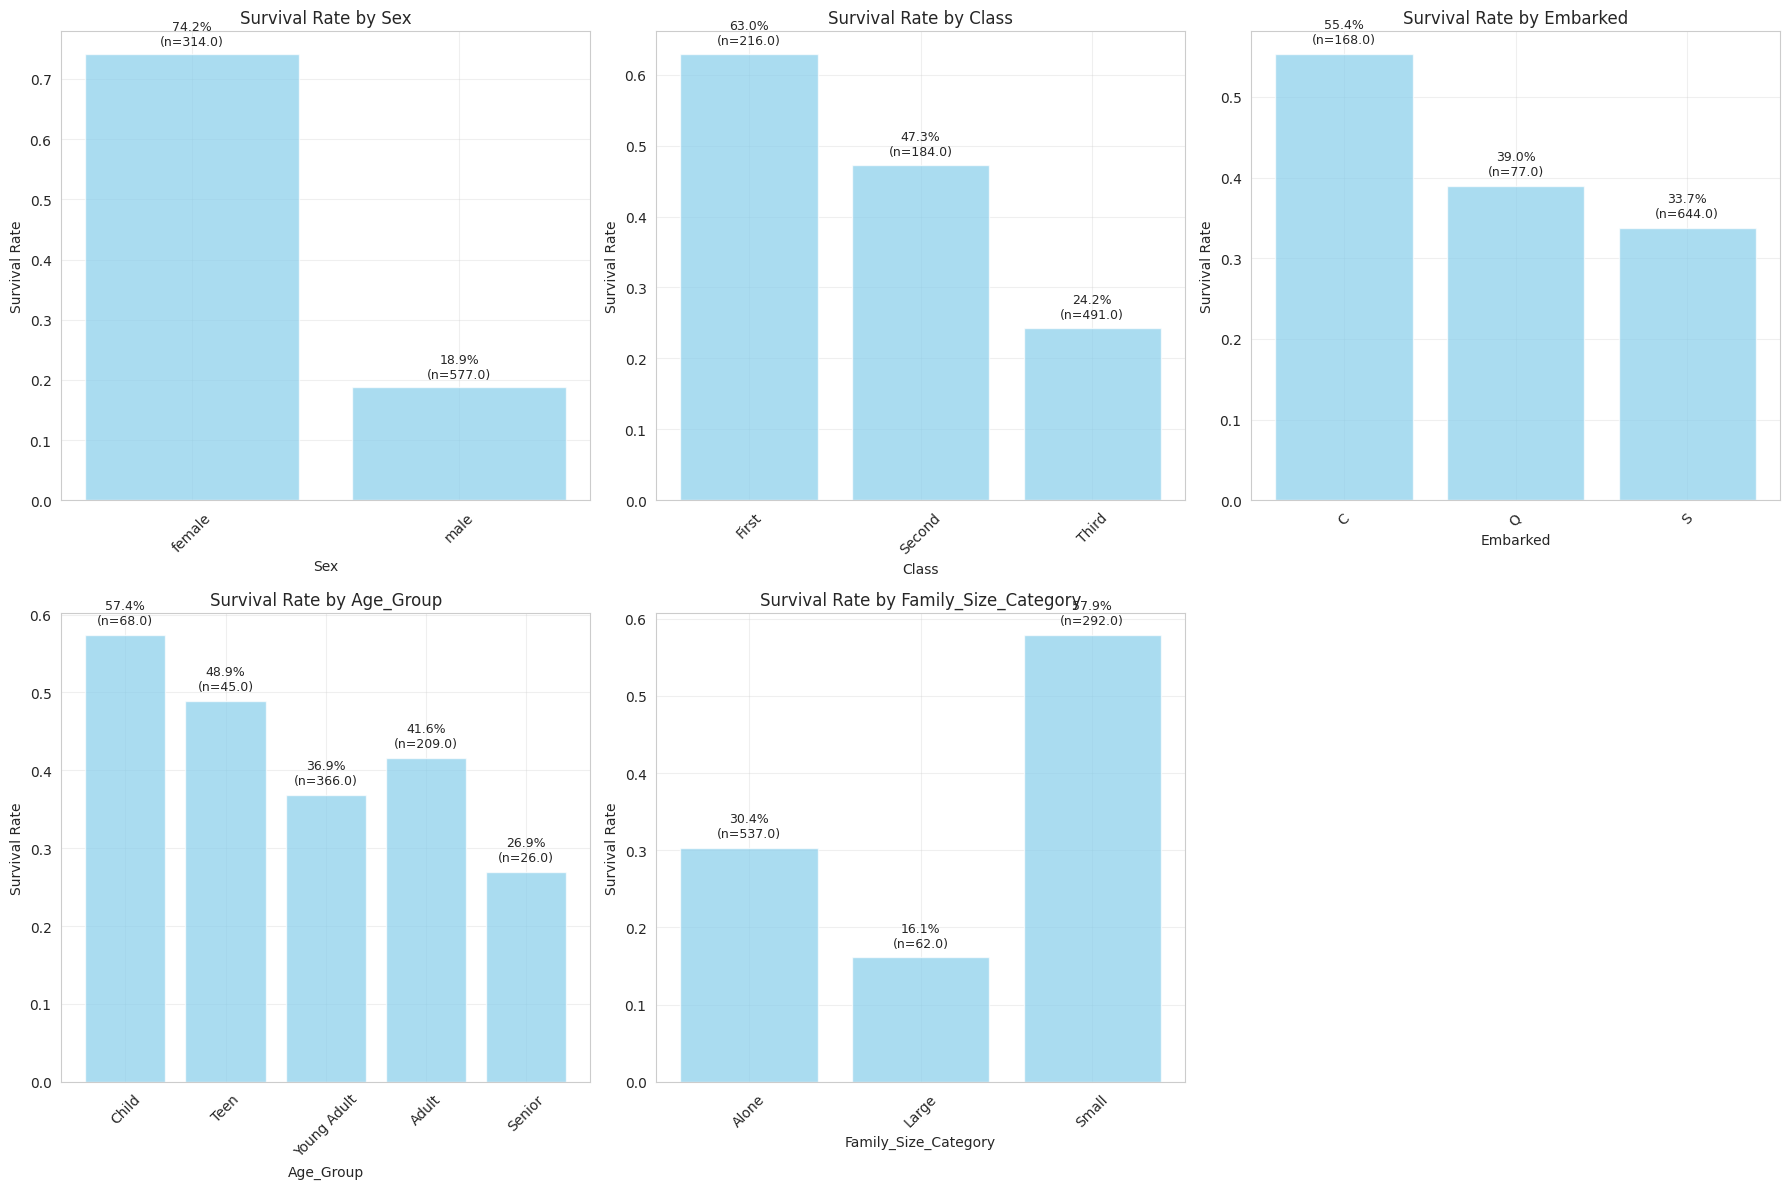

In [49]:
# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù Î∞è ÏãúÍ∞ÅÌôî

print("=== ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù ===")

# ÏàòÏπòÌòï Î≥ÄÏàòÎßå ÏÑ†ÌÉù
numeric_columns = titanic_engineered.select_dtypes(include=[np.number]).columns.tolist()

# ÏÉùÏ°¥ Ïó¨Î∂ÄÎ•º Ï†úÏô∏Ìïú ÏàòÏπòÌòï Î≥ÄÏàòÎì§
feature_columns = [col for col in numeric_columns if col != 'survived']

if len(feature_columns) > 1:
    # ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Îß§Ìä∏Î¶≠Ïä§ Í≥ÑÏÇ∞
    correlation_matrix = titanic_engineered[feature_columns + ['survived']].corr()
    
    # ÏÉùÏ°¥Í≥ºÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎßå Ï∂îÏ∂ú
    survival_correlation = correlation_matrix['survived'].sort_values(key=abs, ascending=False)
    
    print("1. ÏÉùÏ°¥Í≥ºÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (Ï†àÎåìÍ∞í Í∏∞Ï§Ä):")
    print(survival_correlation.drop('survived'))
    
    # ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ
    plt.figure(figsize=(12, 10))
    
    # Ï†ÑÏ≤¥ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ
    plt.subplot(2, 1, 1)
    sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0,
                fmt='.2f', square=True)
    plt.title('Correlation Matrix - All Numeric Variables')
    
    # ÏÉùÏ°¥Í≥ºÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÎßâÎåÄÍ∑∏ÎûòÌîÑ
    plt.subplot(2, 1, 2)
    survival_corr_plot = survival_correlation.drop('survived')
    colors = ['green' if x > 0 else 'red' for x in survival_corr_plot.values]
    bars = plt.bar(range(len(survival_corr_plot)), survival_corr_plot.values, color=colors, alpha=0.7)
    plt.title('Correlation with Survival')
    plt.xlabel('Features')
    plt.ylabel('Correlation Coefficient')
    plt.xticks(range(len(survival_corr_plot)), survival_corr_plot.index, rotation=45)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    
    # ÎßâÎåÄ ÏúÑÏóê Í∞í ÌëúÏãú
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + (0.01 if height > 0 else -0.03),
                f'{height:.2f}', ha='center', va='bottom' if height > 0 else 'top')
    
    plt.tight_layout()
    plt.show()

# Î≤îÏ£ºÌòï Î≥ÄÏàòÏôÄ ÏÉùÏ°¥Ïùò Í¥ÄÍ≥Ñ
categorical_columns = ['sex', 'class', 'embarked', 'age_group', 'family_size_category']
existing_categorical = [col for col in categorical_columns if col in titanic_engineered.columns]

if existing_categorical:
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    for i, col in enumerate(existing_categorical):
        if i < len(axes):
            # ÏÉùÏ°¥Ïú® Í≥ÑÏÇ∞
            survival_by_category = titanic_engineered.groupby(col)['survived'].agg(['mean', 'count'])
            
            # ÎßâÎåÄÍ∑∏ÎûòÌîÑ
            bars = axes[i].bar(range(len(survival_by_category)), survival_by_category['mean'], 
                              alpha=0.7, color='skyblue')
            axes[i].set_title(f'Survival Rate by {col.title()}')
            axes[i].set_ylabel('Survival Rate')
            axes[i].set_xlabel(col.title())
            axes[i].set_xticks(range(len(survival_by_category)))
            axes[i].set_xticklabels(survival_by_category.index, rotation=45)
            axes[i].grid(True, alpha=0.3)
            
            # ÎßâÎåÄ ÏúÑÏóê ÏÉùÏ°¥Ïú®Í≥º ÏÉòÌîå Ïàò ÌëúÏãú
            for j, bar in enumerate(bars):
                height = bar.get_height()
                count = survival_by_category.iloc[j]['count']
                axes[i].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                           f'{height:.1%}\n(n={count})', ha='center', va='bottom', fontsize=9)
    
    # Îπà ÏÑúÎ∏åÌîåÎ°Ø Ïà®Í∏∞Í∏∞
    for i in range(len(existing_categorical), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()


## 4.2 ÏÉùÏ°¥ Î∂ÑÏÑù Ïã¨Ìôî

=== ÏÉùÏ°¥ Î∂ÑÏÑù Ïã¨Ìôî ===
1. ÏÑ±Î≥Ñ-ÌÅ¥ÎûòÏä§-Ïó∞Î†πÎåÄÎ≥Ñ ÏÉùÏ°¥Ïú® (ÏÉòÌîå 5Î™Ö Ïù¥ÏÉÅ):
                           total  survivors  survival_rate
sex    class  age_group                                   
female First  Teen             7          7          1.000
       Second Child            8          8          1.000
male   Second Child            9          9          1.000
female First  Adult           41         40          0.976
              Young Adult     33         32          0.970
       Second Young Adult     41         38          0.927
              Adult           21         18          0.857
       Third  Teen            12          8          0.667
              Child           23         11          0.478
              Young Adult     51         24          0.471

2. ÏöîÍ∏à Íµ¨Í∞ÑÎ≥Ñ ÏÉùÏ°¥Ïú® (Ïã≠Î∂ÑÏúÑ):
             min_fare  max_fare  avg_fare  passenger_count  survival_rate
fare_decile                                                              
D1    

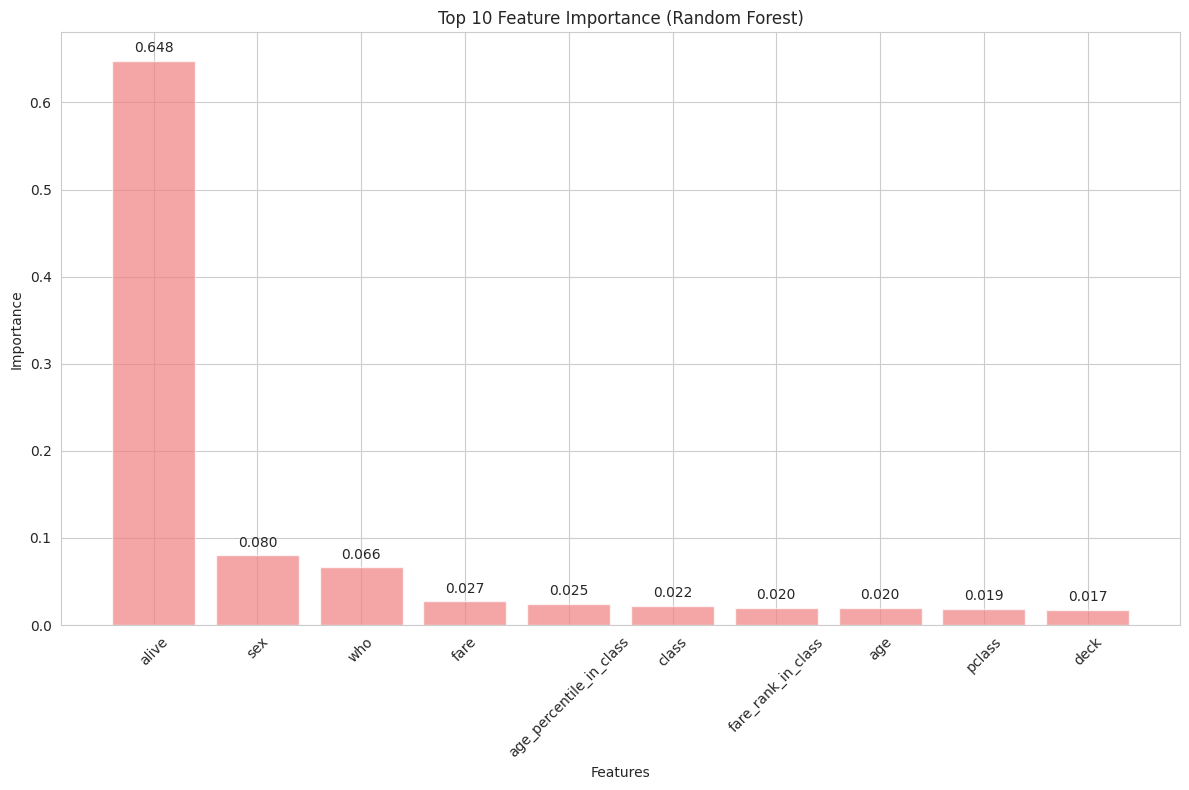

In [50]:
# ÏÉùÏ°¥ Î∂ÑÏÑù Ïã¨Ìôî - Îã§Ï∞®Ïõê Î∂ÑÏÑù

print("=== ÏÉùÏ°¥ Î∂ÑÏÑù Ïã¨Ìôî ===")

# 1. Îã§Ï∞®Ïõê ÏÉùÏ°¥Ïú® Î∂ÑÏÑù
def multi_dimensional_survival_analysis():
    """Îã§Ï∞®Ïõê ÏÉùÏ°¥Ïú® Î∂ÑÏÑù"""
    
    # ÏÑ±Î≥Ñ-ÌÅ¥ÎûòÏä§-Ïó∞Î†πÎåÄÎ≥Ñ ÏÉùÏ°¥Ïú®
    if all(col in titanic_engineered.columns for col in ['sex', 'class', 'age_group']):
        multi_survival = titanic_engineered.groupby(['sex', 'class', 'age_group']).agg({
            'survived': ['count', 'sum', 'mean']
        }).round(3)
        
        multi_survival.columns = ['total', 'survivors', 'survival_rate']
        multi_survival = multi_survival[multi_survival['total'] >= 5]  # ÏÉòÌîåÏù¥ 5Î™Ö Ïù¥ÏÉÅÏù∏ Í≤ΩÏö∞Îßå
        
        print("1. ÏÑ±Î≥Ñ-ÌÅ¥ÎûòÏä§-Ïó∞Î†πÎåÄÎ≥Ñ ÏÉùÏ°¥Ïú® (ÏÉòÌîå 5Î™Ö Ïù¥ÏÉÅ):")
        print(multi_survival.sort_values('survival_rate', ascending=False).head(10))
    
    # 2. ÏöîÍ∏àÍ≥º ÏÉùÏ°¥Ïùò Í¥ÄÍ≥Ñ (Íµ¨Í∞ÑÎ≥Ñ)
    if 'fare' in titanic_engineered.columns:
        # ÏöîÍ∏àÏùÑ 10Í∞ú Íµ¨Í∞ÑÏúºÎ°ú ÎÇòÎàÑÏñ¥ Î∂ÑÏÑù
        titanic_engineered['fare_decile'] = pd.qcut(
            titanic_engineered['fare'].fillna(titanic_engineered['fare'].median()), 
            q=10, 
            labels=[f'D{i+1}' for i in range(10)]
        )
        
        fare_survival = titanic_engineered.groupby('fare_decile').agg({
            'fare': ['min', 'max', 'mean'],
            'survived': ['count', 'mean']
        }).round(2)
        
        fare_survival.columns = ['min_fare', 'max_fare', 'avg_fare', 'passenger_count', 'survival_rate']
        
        print(f"\n2. ÏöîÍ∏à Íµ¨Í∞ÑÎ≥Ñ ÏÉùÏ°¥Ïú® (Ïã≠Î∂ÑÏúÑ):")
        print(fare_survival)
    
    return multi_survival if 'multi_survival' in locals() else None

multi_analysis = multi_dimensional_survival_analysis()

# 3. Í∞ÄÏÑ§ Í≤ÄÏ¶ùÏùÑ ÏúÑÌïú ÌÜµÍ≥Ñ ÌÖåÏä§Ìä∏
from scipy.stats import chi2_contingency

def statistical_tests():
    """ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ± Í≤ÄÏ¶ù"""
    print(f"\n=== ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ± Í≤ÄÏ¶ù ===")
    
    # Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï: ÏÑ±Î≥ÑÍ≥º ÏÉùÏ°¥Ïùò ÎèÖÎ¶ΩÏÑ±
    if all(col in titanic_engineered.columns for col in ['sex', 'survived']):
        contingency_table = pd.crosstab(titanic_engineered['sex'], titanic_engineered['survived'])
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        
        print(f"1. ÏÑ±Î≥ÑÍ≥º ÏÉùÏ°¥Ïùò ÎèÖÎ¶ΩÏÑ± Í≤ÄÏ†ï:")
        print(f"   Chi-square statistic: {chi2:.4f}")
        print(f"   P-value: {p_value:.4e}")
        print(f"   Í≤∞Î°†: {'Ïú†ÏùòÌïú Í¥ÄÍ≥Ñ ÏûàÏùå' if p_value < 0.05 else 'Ïú†ÏùòÌïú Í¥ÄÍ≥Ñ ÏóÜÏùå'}")
        
        print(f"   Î∂ÑÌï†Ìëú:")
        print(contingency_table)
    
    # ÌÅ¥ÎûòÏä§ÏôÄ ÏÉùÏ°¥Ïùò ÎèÖÎ¶ΩÏÑ±
    if all(col in titanic_engineered.columns for col in ['class', 'survived']):
        contingency_table_class = pd.crosstab(titanic_engineered['class'], titanic_engineered['survived'])
        chi2_class, p_value_class, dof_class, expected_class = chi2_contingency(contingency_table_class)
        
        print(f"\n2. ÌÅ¥ÎûòÏä§ÏôÄ ÏÉùÏ°¥Ïùò ÎèÖÎ¶ΩÏÑ± Í≤ÄÏ†ï:")
        print(f"   Chi-square statistic: {chi2_class:.4f}")
        print(f"   P-value: {p_value_class:.4e}")
        print(f"   Í≤∞Î°†: {'Ïú†ÏùòÌïú Í¥ÄÍ≥Ñ ÏûàÏùå' if p_value_class < 0.05 else 'Ïú†ÏùòÌïú Í¥ÄÍ≥Ñ ÏóÜÏùå'}")

statistical_tests()

# 4. ÏÉùÏ°¥ ÏòàÏ∏° Î™®Îç∏ÏùÑ ÏúÑÌïú ÌäπÏÑ± Ï§ëÏöîÎèÑ (Í∞ÑÎã®Ìïú Î≤ÑÏ†Ñ)
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

def feature_importance_analysis():
    """ÌäπÏÑ± Ï§ëÏöîÎèÑ Î∂ÑÏÑù"""
    print(f"\n=== ÌäπÏÑ± Ï§ëÏöîÎèÑ Î∂ÑÏÑù ===")
    
    # Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
    df_model = titanic_engineered.copy()
    
    # Î≤îÏ£ºÌòï Î≥ÄÏàò Ïù∏ÏΩîÎî©
    categorical_cols = df_model.select_dtypes(include=['object', 'category']).columns
    le_dict = {}
    
    for col in categorical_cols:
        if col in df_model.columns and col != 'name':  # nameÏùÄ Ï†úÏô∏
            le = LabelEncoder()
            df_model[col] = le.fit_transform(df_model[col].astype(str))
            le_dict[col] = le
    
    # ÌäπÏÑ±Í≥º ÌÉÄÍ≤ü Î∂ÑÎ¶¨
    feature_cols = [col for col in df_model.columns 
                   if col not in ['survived', 'name'] and df_model[col].dtype in ['int64', 'float64']]
    
    X = df_model[feature_cols].fillna(df_model[feature_cols].median())
    y = df_model['survived']
    
    # ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏ ÌïôÏäµ
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X, y)
    
    # ÌäπÏÑ± Ï§ëÏöîÎèÑ Ï∂îÏ∂ú
    feature_importance = pd.DataFrame({
        'feature': feature_cols,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("ÌäπÏÑ± Ï§ëÏöîÎèÑ (ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Í∏∞Ï§Ä):")
    print(feature_importance.head(10))
    
    # ÌäπÏÑ± Ï§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(12, 8))
    top_features = feature_importance.head(10)
    bars = plt.bar(range(len(top_features)), top_features['importance'], 
                   color='lightcoral', alpha=0.7)
    plt.title('Top 10 Feature Importance (Random Forest)')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.xticks(range(len(top_features)), top_features['feature'], rotation=45)
    
    # ÎßâÎåÄ ÏúÑÏóê Í∞í ÌëúÏãú
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + max(top_features['importance']) * 0.01,
                f'{height:.3f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    return feature_importance

importance_analysis = feature_importance_analysis()

In [51]:
# Î∞±ÏóîÎìú Í∞úÎ∞úÏûêÍ∞Ä Íº≠ ÏïåÏïÑÏïº Ìï† pandas ÌïµÏã¨ Í∞úÎÖê Ï†ïÎ¶¨

pandas_essentials = {
    "Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞": {
        "Series": "1Ï∞®Ïõê ÎùºÎ≤®Îêú Î∞∞Ïó¥ (SQLÏùò Ïª¨ÎüºÍ≥º Ïú†ÏÇ¨)",
        "DataFrame": "2Ï∞®Ïõê ÌÖåÏù¥Î∏î Íµ¨Ï°∞ (Í¥ÄÍ≥ÑÌòï Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ ÌÖåÏù¥Î∏îÍ≥º Ïú†ÏÇ¨)",
        "Index": "ÌñâÍ≥º Ïó¥Ïùò ÎùºÎ≤® (Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§Ïùò Ïù∏Îç±Ïä§ÏôÄ Ïú†ÏÇ¨)"
    },
    
    "Îç∞Ïù¥ÌÑ∞ Ï°∞Ïûë (SQL ÎåÄÎπÑ)": {
        "SELECT": "df[['column1', 'column2']]",
        "WHERE": "df[df['column'] > value]",
        "ORDER BY": "df.sort_values('column')",
        "GROUP BY": "df.groupby('column').agg()",
        "JOIN": "pd.merge(df1, df2, on='key')",
        "UNION": "pd.concat([df1, df2])"
    },
    
    "Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù ÏõåÌÅ¨ÌîåÎ°úÏö∞": {
        "1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú": "pd.read_csv(), pd.read_sql()",
        "2. Îç∞Ïù¥ÌÑ∞ ÌÉêÏÉâ": "df.info(), df.describe(), df.head()",
        "3. Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†ú": "Í≤∞Ï∏°Í∞í Ï≤òÎ¶¨, Ïù¥ÏÉÅÏπò Ï†úÍ±∞, ÌÉÄÏûÖ Î≥ÄÌôò",
        "4. ÌäπÏÑ± ÏóîÏßÄÎãàÏñ¥ÎßÅ": "ÏÉàÎ°úÏö¥ Ïª¨Îüº ÏÉùÏÑ±, ÌååÏÉù Î≥ÄÏàò ÎßåÎì§Í∏∞",
        "5. Î∂ÑÏÑù Î∞è ÏãúÍ∞ÅÌôî": "groupby, pivot, ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù",
        "6. Í≤∞Í≥º Ï†ÄÏû•": "df.to_csv(), df.to_sql()"
    },
    
    "ÏÑ±Îä• ÏµúÏ†ÅÌôî": {
        "Î≤°ÌÑ∞Ìôî Ïó∞ÏÇ∞": "Î∞òÎ≥µÎ¨∏ ÎåÄÏã† numpy Ïó∞ÏÇ∞ ÌôúÏö©",
        "Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ÏµúÏ†ÅÌôî": "category, int8/16, float32 ÏÇ¨Ïö©",
        "Ïù∏Îç±Ïä§ ÌôúÏö©": "ÏûêÏ£º ÌïÑÌÑ∞ÎßÅÌïòÎäî Ïª¨ÎüºÏùÑ Ïù∏Îç±Ïä§Î°ú ÏÑ§Ï†ï",
        "Ï≤≠ÌÅ¨ Ï≤òÎ¶¨": "ÎåÄÏö©Îüâ ÌååÏùºÏùÄ chunksize Îß§Í∞úÎ≥ÄÏàò ÏÇ¨Ïö©"
    }
}

print("=== Î∞±ÏóîÎìú Í∞úÎ∞úÏûêÎ•º ÏúÑÌïú pandas ÌïµÏã¨ ÏöîÏïΩ ===")
for category, items in pandas_essentials.items():
    print(f"\nüìå {category}")
    for key, value in items.items():
        print(f"   {key}: {value}")

=== Î∞±ÏóîÎìú Í∞úÎ∞úÏûêÎ•º ÏúÑÌïú pandas ÌïµÏã¨ ÏöîÏïΩ ===

üìå Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞
   Series: 1Ï∞®Ïõê ÎùºÎ≤®Îêú Î∞∞Ïó¥ (SQLÏùò Ïª¨ÎüºÍ≥º Ïú†ÏÇ¨)
   DataFrame: 2Ï∞®Ïõê ÌÖåÏù¥Î∏î Íµ¨Ï°∞ (Í¥ÄÍ≥ÑÌòï Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ ÌÖåÏù¥Î∏îÍ≥º Ïú†ÏÇ¨)
   Index: ÌñâÍ≥º Ïó¥Ïùò ÎùºÎ≤® (Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§Ïùò Ïù∏Îç±Ïä§ÏôÄ Ïú†ÏÇ¨)

üìå Îç∞Ïù¥ÌÑ∞ Ï°∞Ïûë (SQL ÎåÄÎπÑ)
   SELECT: df[['column1', 'column2']]
   WHERE: df[df['column'] > value]
   ORDER BY: df.sort_values('column')
   GROUP BY: df.groupby('column').agg()
   JOIN: pd.merge(df1, df2, on='key')
   UNION: pd.concat([df1, df2])

üìå Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù ÏõåÌÅ¨ÌîåÎ°úÏö∞
   1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú: pd.read_csv(), pd.read_sql()
   2. Îç∞Ïù¥ÌÑ∞ ÌÉêÏÉâ: df.info(), df.describe(), df.head()
   3. Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†ú: Í≤∞Ï∏°Í∞í Ï≤òÎ¶¨, Ïù¥ÏÉÅÏπò Ï†úÍ±∞, ÌÉÄÏûÖ Î≥ÄÌôò
   4. ÌäπÏÑ± ÏóîÏßÄÎãàÏñ¥ÎßÅ: ÏÉàÎ°úÏö¥ Ïª¨Îüº ÏÉùÏÑ±, ÌååÏÉù Î≥ÄÏàò ÎßåÎì§Í∏∞
   5. Î∂ÑÏÑù Î∞è ÏãúÍ∞ÅÌôî: groupby, pivot, ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù
   6. Í≤∞Í≥º Ï†ÄÏû•: df.to_csv(), df.to_sql()

üìå ÏÑ±Îä• ÏµúÏ†Å

In [52]:
# Ïã§Î¨¥ÏóêÏÑú pandasÎ•º Ìö®Í≥ºÏ†ÅÏúºÎ°ú ÌôúÏö©ÌïòÍ∏∞ ÏúÑÌïú Í∞ÄÏù¥ÎìúÎùºÏù∏

practical_guidelines = """
=== Ïã§Î¨¥ pandas ÌôúÏö© Í∞ÄÏù¥ÎìúÎùºÏù∏ ===

üîç 1. Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù ÌîÑÎ°úÏ†ùÌä∏ ÏãúÏûë Ïãú
   - Ìï≠ÏÉÅ Îç∞Ïù¥ÌÑ∞ ÌíàÏßàÎ∂ÄÌÑ∞ ÌôïÏù∏ (df.info(), df.describe())
   - Í≤∞Ï∏°Í∞íÍ≥º Ïù¥ÏÉÅÏπò Ìå®ÌÑ¥ ÌååÏïÖ
   - Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ Ï≤¥ÌÅ¨ (ÌÅ∞ Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Í≤ΩÏö∞)

üìä 2. ÌÉêÏÉâÏ†Å Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù (EDA)
   - Îã®Î≥ÄÎüâ Î∂ÑÏÑù: ÌûàÏä§ÌÜ†Í∑∏Îû®, Î∞ïÏä§ÌîåÎ°Ø
   - Ïù¥Î≥ÄÎüâ Î∂ÑÏÑù: ÏÇ∞Ï†êÎèÑ, ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ
   - Îã§Î≥ÄÎüâ Î∂ÑÏÑù: Í∑∏Î£πÌôî, ÌîºÎ≤ó ÌÖåÏù¥Î∏î

üõ†Ô∏è 3. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
   - Í≤∞Ï∏°Í∞í: ÎèÑÎ©îÏù∏ ÏßÄÏãùÏùÑ ÌôúÏö©Ìïú Ï≤òÎ¶¨ Ï†ÑÎûµ
   - Ïù¥ÏÉÅÏπò: ÎπÑÏ¶àÎãàÏä§ Îß•ÎùΩÏóêÏÑú ÌåêÎã®
   - ÌäπÏÑ± ÏóîÏßÄÎãàÏñ¥ÎßÅ: ÎèÑÎ©îÏù∏ Ï†ÑÎ¨∏Í∞ÄÏôÄ ÌòëÏóÖ

üìà 4. Î∂ÑÏÑù Í≤∞Í≥º Ìï¥ÏÑù
   - ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ± Í≥†Î†§
   - Ïã§Î¨¥ÏßÑÍ≥º ÏÜåÌÜµ Í∞ÄÎä•Ìïú Ïù∏ÏÇ¨Ïù¥Ìä∏ ÎèÑÏ∂ú
   - ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌïú ÏßÅÍ¥ÄÏ†Å Ï†ÑÎã¨

‚ö° 5. ÏÑ±Îä• Í≥†Î†§ÏÇ¨Ìï≠
   - 100MB Ïù¥ÏÉÅ: Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ÏµúÏ†ÅÌôî ÌïÑÏàò
   - 1GB Ïù¥ÏÉÅ: Ï≤≠ÌÅ¨ Îã®ÏúÑ Ï≤òÎ¶¨ ÎòêÎäî Dask ÏÇ¨Ïö© Í≤ÄÌÜ†
   - 10GB Ïù¥ÏÉÅ: Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ ÎÇ¥ Ï≤òÎ¶¨ ÎòêÎäî Î∂ÑÏÇ∞ Ï≤òÎ¶¨ Í≥†Î†§
"""

print(practical_guidelines)


=== Ïã§Î¨¥ pandas ÌôúÏö© Í∞ÄÏù¥ÎìúÎùºÏù∏ ===

üîç 1. Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù ÌîÑÎ°úÏ†ùÌä∏ ÏãúÏûë Ïãú
   - Ìï≠ÏÉÅ Îç∞Ïù¥ÌÑ∞ ÌíàÏßàÎ∂ÄÌÑ∞ ÌôïÏù∏ (df.info(), df.describe())
   - Í≤∞Ï∏°Í∞íÍ≥º Ïù¥ÏÉÅÏπò Ìå®ÌÑ¥ ÌååÏïÖ
   - Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ Ï≤¥ÌÅ¨ (ÌÅ∞ Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Í≤ΩÏö∞)

üìä 2. ÌÉêÏÉâÏ†Å Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù (EDA)
   - Îã®Î≥ÄÎüâ Î∂ÑÏÑù: ÌûàÏä§ÌÜ†Í∑∏Îû®, Î∞ïÏä§ÌîåÎ°Ø
   - Ïù¥Î≥ÄÎüâ Î∂ÑÏÑù: ÏÇ∞Ï†êÎèÑ, ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ
   - Îã§Î≥ÄÎüâ Î∂ÑÏÑù: Í∑∏Î£πÌôî, ÌîºÎ≤ó ÌÖåÏù¥Î∏î

üõ†Ô∏è 3. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
   - Í≤∞Ï∏°Í∞í: ÎèÑÎ©îÏù∏ ÏßÄÏãùÏùÑ ÌôúÏö©Ìïú Ï≤òÎ¶¨ Ï†ÑÎûµ
   - Ïù¥ÏÉÅÏπò: ÎπÑÏ¶àÎãàÏä§ Îß•ÎùΩÏóêÏÑú ÌåêÎã®
   - ÌäπÏÑ± ÏóîÏßÄÎãàÏñ¥ÎßÅ: ÎèÑÎ©îÏù∏ Ï†ÑÎ¨∏Í∞ÄÏôÄ ÌòëÏóÖ

üìà 4. Î∂ÑÏÑù Í≤∞Í≥º Ìï¥ÏÑù
   - ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ± Í≥†Î†§
   - Ïã§Î¨¥ÏßÑÍ≥º ÏÜåÌÜµ Í∞ÄÎä•Ìïú Ïù∏ÏÇ¨Ïù¥Ìä∏ ÎèÑÏ∂ú
   - ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌïú ÏßÅÍ¥ÄÏ†Å Ï†ÑÎã¨

‚ö° 5. ÏÑ±Îä• Í≥†Î†§ÏÇ¨Ìï≠
   - 100MB Ïù¥ÏÉÅ: Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ÏµúÏ†ÅÌôî ÌïÑÏàò
   - 1GB Ïù¥ÏÉÅ: Ï≤≠ÌÅ¨ Îã®ÏúÑ Ï≤òÎ¶¨ ÎòêÎäî Dask ÏÇ¨Ïö© Í≤ÄÌÜ†
   - 10GB Ïù¥ÏÉÅ: Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä